# Exercici 1

Parteix el conjunt de dadesDelayedFlights.csv en train i test. Estudia els dos conjunts per separat, a nivell descriptiu

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_flights = pd.read_csv('DelayFlights_clean.csv')

In [3]:
df_flights.drop('Unnamed: 0',axis=1,inplace=True)
df_flights.head()

,Date,DayOfWeek,UniqueCarrier,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008-01-03,Thursday,WN,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0.0,0.0,0.0,0.0,0.0
1,2008-01-03,Thursday,WN,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0.0,0.0,0.0,0.0,0.0
2,2008-01-03,Thursday,WN,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,2.0,0.0,0.0,0.0,32.0
3,2008-01-03,Thursday,WN,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0.0,0.0,0.0,0.0,0.0
4,2008-01-03,Thursday,WN,N763SW,240.0,250.0,230.0,57.0,67.0,IND,LAS,1591,3.0,7.0,10.0,0.0,0.0,0.0,47.0


In [4]:
from sklearn.model_selection import train_test_split

In [6]:
train, test = train_test_split(df_flights,test_size=0.3) # split 30% of DATA

In [7]:
train.shape, test.shape

((1300196, 19), (557227, 19))

In [8]:
train.describe().round(2)

,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1300196.00,1300196.00,1300196.00,1300196.00,1300196.00,1300196.00,1300196.00,1300196.00,1300196.00,1300196.00,1300196.00,1300196.00,1300196.00
mean,133.46,134.49,108.39,43.43,44.46,766.49,6.81,18.27,12.88,2.48,10.11,0.06,17.03
std,72.14,71.27,68.65,57.61,53.89,574.34,5.30,14.52,36.76,17.76,28.64,1.59,36.56
min,14.00,-21.00,1.00,-109.00,6.00,11.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,80.00,82.00,58.00,9.00,13.00,339.00,4.00,10.00,0.00,0.00,0.00,0.00,0.00
50%,116.00,117.00,90.00,26.00,25.00,607.00,6.00,14.00,0.00,0.00,0.00,0.00,0.00
75%,165.00,165.00,137.00,58.00,55.00,998.00,8.00,21.00,11.00,0.00,7.00,0.00,20.00
max,1114.00,660.00,1091.00,2453.00,2467.00,4962.00,240.00,422.00,2436.00,1352.00,1357.00,280.00,1316.00


In [9]:
test.describe().round(2)

,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,557227.00,557227.00,557227.00,557227.00,557227.00,557227.00,557227.00,557227.00,557227.00,557227.00,557227.00,557227.00,557227.0
mean,133.54,134.60,108.49,43.27,44.34,767.40,6.81,18.24,12.89,2.49,10.05,0.06,16.9
std,72.13,71.28,68.66,57.34,53.67,574.43,5.31,14.45,36.91,17.56,28.53,1.81,36.2
min,16.00,15.00,1.00,-67.00,6.00,24.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
25%,80.00,82.00,58.00,8.00,13.00,341.00,4.00,10.00,0.00,0.00,0.00,0.00,0.0
50%,116.00,117.00,91.00,26.00,25.00,610.00,6.00,14.00,0.00,0.00,0.00,0.00,0.0
75%,165.00,165.00,137.00,58.00,55.00,1005.00,8.00,21.00,11.00,0.00,7.00,0.00,19.0
max,724.00,660.00,648.00,2461.00,2457.00,4962.00,225.00,393.00,1707.00,1225.00,1207.00,392.00,1002.0


Text(0.5, 1.0, 'TRAINING SET')

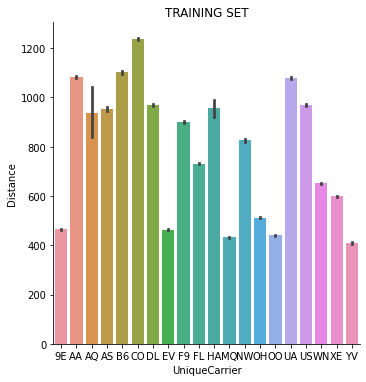

In [10]:
sns.catplot(x='UniqueCarrier',y = 'Distance',data=train.sort_values(by='UniqueCarrier'),kind='bar')
plt.title ('TRAINING SET')

Text(0.5, 1.0, 'TESTING SET')

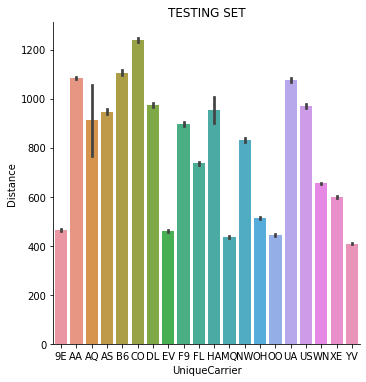

In [11]:
sns.catplot(x='UniqueCarrier',y = 'Distance',data=test.sort_values(by='UniqueCarrier'),kind='bar')
plt.title('TESTING SET')

Text(0.5, 1.0, 'TRAINING')

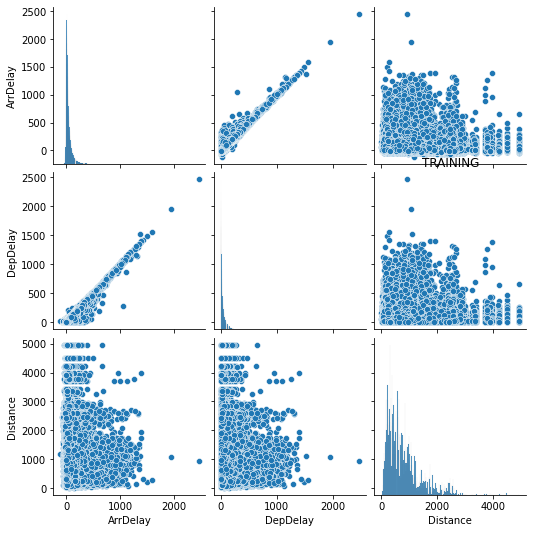

In [12]:
sns.pairplot(train[['ArrDelay','DepDelay','Distance']])
plt.title('TRAINING')

Text(0.5, 1.0, 'TESTING')

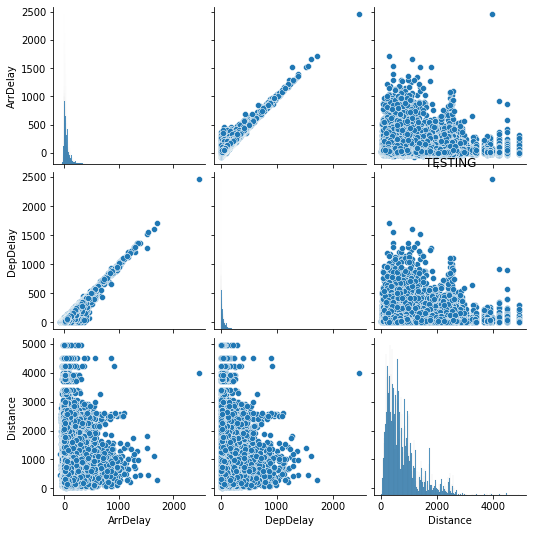

In [13]:
sns.pairplot(test[['ArrDelay','DepDelay','Distance']])
plt.title('TESTING')

# Exercici 2

Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

In [14]:
flights_encoded = pd.get_dummies(df_flights, columns=['DayOfWeek','UniqueCarrier'],prefix='',drop_first=False,prefix_sep='')

In [15]:
cols_num =['ArrDelay','DepDelay']
flights_encoded.head()

,Date,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,9E,AA,AQ,AS,B6,CO,DL,EV,F9,FL,HA,MQ,NW,OH,OO,UA,US,WN,XE,YV
0,2008-01-03,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2008-01-03,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2008-01-03,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,2.0,0.0,0.0,0.0,32.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2008-01-03,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2008-01-03,N763SW,240.0,250.0,230.0,57.0,67.0,IND,LAS,1591,3.0,7.0,10.0,0.0,0.0,0.0,47.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


<AxesSubplot:ylabel='Count'>

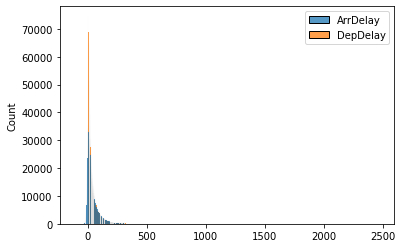

In [16]:
sns.histplot(flights_encoded[cols_num])

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
model = StandardScaler()

X_mms = pd.DataFrame(model.fit_transform(flights_encoded[cols_num]),columns=cols_num)
X_mms.head()

,ArrDelay,DepDelay
0,-0.997419,-0.676706
1,-0.719297,-0.472342
2,-0.163054,-0.193663
3,-0.562853,-0.360870
4,0.236746,0.419429


<AxesSubplot:ylabel='Count'>

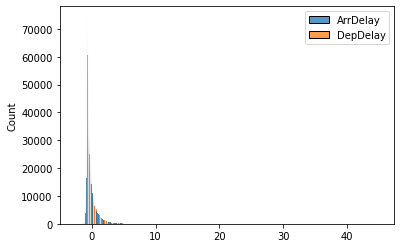

In [19]:
sns.histplot(X_mms)

# Exercici 3

Resumeix les noves columnes generades de manera estadística i gràfica

In [21]:
display(X_mms.mean())
display(X_mms.std())

ArrDelay   -6.557007e-14
DepDelay   -1.213786e-13
dtype: float64

ArrDelay    1.0
DepDelay    1.0
dtype: float64

In [22]:
X_mms.describe()

,ArrDelay,DepDelay
count,1.857423e+06,1.857423e+06
mean,5.190333e-17,3.892750e-17
std,1.000000e+00,1.000000e+00
min,-2.648766e+00,-7.138629e-01
25%,-5.976187e-01,-5.838130e-01
50%,-3.021145e-01,-3.608704e-01
75%,2.541288e-01,1.964861e-01
max,4.202452e+01,4.500795e+01


array([[<AxesSubplot:title={'center':'ArrDelay'}>,
        <AxesSubplot:title={'center':'DepDelay'}>]], dtype=object)

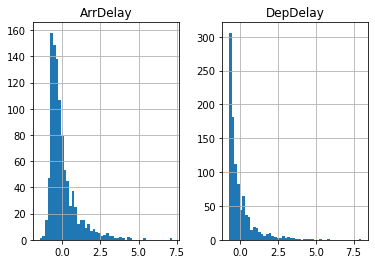

In [50]:
replicas = X_mms.sample(n=1000,replace=False,random_state=123)
replicas.hist(bins=50)

In [51]:
replicas.mean()

ArrDelay   -0.006854
DepDelay   -0.011817
dtype: float64

In [72]:
selected_carriers = ['9E','AA','AQ','AS','B6','CO','DL','EV']

<ipython-input-74-f2a7aa15d8ad>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  flights_encoded.groupby('Date')['9E','AA'].sum().plot()


Text(0.5, 1.0, 'flights for each carrier')

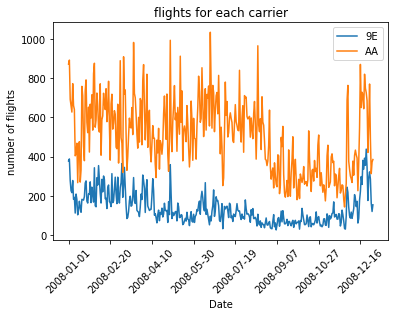

In [74]:
flights_encoded.groupby('Date')['9E','AA'].sum().plot()
plt.xticks(rotation=45)
plt.ylabel('number of flights')
plt.title('flights for each carrier')


Text(0.5, 1.0, 'Number of Flights according to the day of the week')

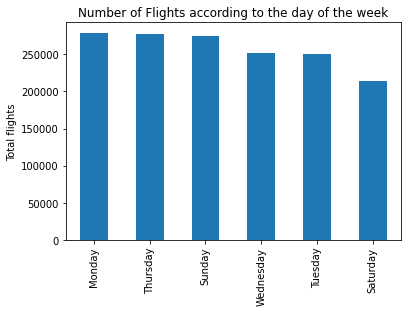

In [96]:
total_week= flights_encoded[['Monday','Saturday','Sunday','Thursday','Tuesday','Wednesday']].sum().sort_values(ascending=False)

total_week.plot.bar()
plt.ylabel('Total flights')
plt.title('Number of Flights according to the day of the week')

In [114]:
flights_encoded[['Monday','Saturday','Sunday','Thursday','Tuesday','Wednesday']].describe()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,1.857423e+06,1.857423e+06,1.857423e+06,1.857423e+06,1.857423e+06,1.857423e+06
mean,1.502043e-01,1.154094e-01,1.479523e-01,1.492369e-01,1.346635e-01,1.354043e-01
std,3.572717e-01,3.195154e-01,3.550528e-01,3.563219e-01,3.413638e-01,3.421550e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [118]:
flights_encoded[['Monday','Saturday','Sunday','Thursday','Tuesday','Wednesday']].mean().sort_values(ascending=False)

Monday       0.150204
Thursday     0.149237
Sunday       0.147952
Wednesday    0.135404
Tuesday      0.134663
Saturday     0.115409
dtype: float64